LeNet-5 
- LeNet-5는 복잡하지 않은 망을 이용하여 (당시 기준)높은 성능을 보여주었을 뿐만 아니라 Convolutional layer와 pooling의 조합을 반복하는 현대적인 CNN 구조를 제안했다는 점에서 의미가 있는 모델 
- https://velog.io/@woojinn8/CNN-Network-1.-LeNet


Visual Geometry Group Net(VGGNet)

활성화 함수로 ReLU 사용, Dropout 적용

합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조

인위적으로 데이터셋을 늘림

이미지 변환, 좌우 반전 등의 변환을 시도
몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성

모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용

합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용

특성맵 깊이를 증가 시킴

척도 변경을 통한 데이터 보강(Data Augmentation)

3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐

11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음

이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴

VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

LeNet-5, AlexNet, VGG-16, ResNet, Inception Network
https://wooono.tistory.com/233


- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스


In [ ]:
import tensorflow as tf
vgg_net = tf.keras.applications.VGG16(include_top = True, weights = 'imagenet',
                                      input_tensor = None, input_shape = None,
                                      pooling = None, classes = 1000)

vgg_net.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
import tensorflow as tf
vgg_net = tf.keras.applications.VGG19(include_top = True, weights = 'imagenet',
                                      input_tensor = None, input_shape = None,
                                      pooling = None, classes = 1000)

vgg_net.summary()

574726144/574710816 [==============================] - 20s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           


# GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림


  <img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

  <sub>[이미지 출처] https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5</sub>

  <br>

- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html</sub>


In [ ]:
inception3_net=tf.keras.applications.InceptionV3(include_top = True, weights = 'imagenet',
                                      input_tensor = None, input_shape = None,
                                      pooling = None, classes = 1000)
inception3_net.summary()

96124928/96112376 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음

<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [ ]:
resnet50=tf.keras.applications.ResNet50V2(include_top = True, weights = 'imagenet',
                                      input_tensor = None, input_shape = None,
                                      pooling = None, classes = 1000)
resnet50.summary()

102883328/102869336 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                      

[과제] VGG19를 적용하여 강아지 고양이 분류 모델을 구성 후 성능을 시각화하여 평가하세요.(사전 학습된 모델 적용, 데이터 증식 방식, 미세조정)
<br><br>
[과제] 상기 과제에서 미세조정을 최상위 block 2개를 적용해서 수행하세요.

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import optimizers
vgg19 = tf.keras.applications.VGG19(include_top = False, weights = 'imagenet',input_shape=(150,150,3))

80150528/80134624 [==============================] - 1s 0us/step


In [7]:
set_trainable = 0
for layer in vgg19.layers:
    if layer.name == 'block4_conv1':
        set_trainable = 1
    if set_trainable == 1:
        layer.trainable = True
        print(set_trainable)
    elif set_trainable == 0:
        layer.trainable = False
        print(set_trainable)

0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1


In [ ]:
vgg19.trainable = True

set_trainable = False
for layer in vgg19.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
from tensorflow.keras import models,layers
model = models.Sequential()
model.add(vgg19)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 38s - loss: 0.0295 - acc: 0.9955 - val_loss: 0.3899 - val_acc: 0.9310 - 38s/epoch - 377ms/step
Epoch 2/100
100/100 - 37s - loss: 0.0173 - acc: 0.9965 - val_loss: 0.3538 - val_acc: 0.9290 - 37s/epoch - 372ms/step
Epoch 3/100
100/100 - 42s - loss: 0.0210 - acc: 0.9965 - val_loss: 0.5844 - val_acc: 0.9210 - 42s/epoch - 416ms/step
Epoch 4/100
100/100 - 36s - loss: 0.0088 - acc: 0.9965 - val_loss: 0.3723 - val_acc: 0.9380 - 36s/epoch - 360ms/step
Epoch 5/100
100/100 - 36s - loss: 0.0098 - acc: 0.9960 - val_loss: 0.3742 - val_acc: 0.9390 - 36s/epoch - 355ms/step
Epoch 6/100
100/100 - 36s - loss: 0.0164 - acc: 0.9945 - val_loss: 0.3452 - val_acc: 0.9350 - 36s/epoch - 361ms/step
Epoch 7/100
100/100 - 37s - loss: 0.0162 - acc: 0.9945 - val_loss: 0.3500 - val_acc: 0.9390 - 37s/epoch - 371ms/step
Epoch 8/100
100/100 - 35s - loss: 0.0135 - acc: 0.9955 - val_loss: 0.4020 - val_acc: 0.9380 - 35s

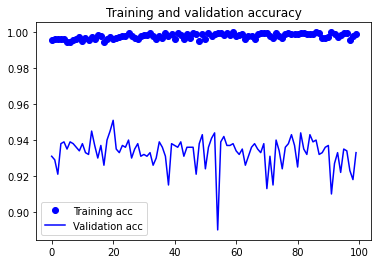

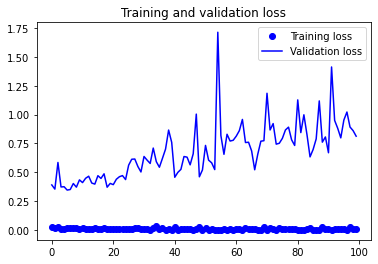

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

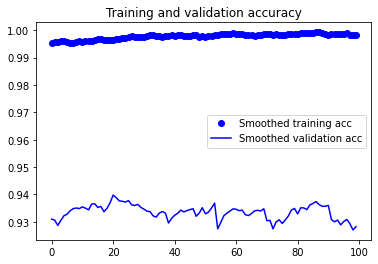

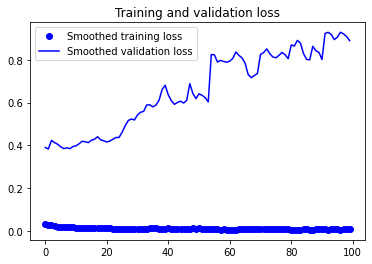

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[과제2]

In [ ]:
vgg19 = tf.keras.applications.VGG19(include_top = False, weights = 'imagenet',input_shape=(150,150,3))
set_trainable = False

for layer in vgg19.layers:
  if layer.name == 'block4_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
  
model = models.Sequential()
model.add(vgg19)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

base_dir = '/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 39s - loss: 0.4047 - acc: 0.8150 - val_loss: 0.2048 - val_acc: 0.9150 - 39s/epoch - 390ms/step
Epoch 2/100
100/100 - 36s - loss: 0.2322 - acc: 0.9015 - val_loss: 0.1461 - val_acc: 0.9380 - 36s/epoch - 358ms/step
Epoch 3/100
100/100 - 37s - loss: 0.1742 - acc: 0.9295 - val_loss: 0.1595 - val_acc: 0.9340 - 37s/epoch - 374ms/step
Epoch 4/100
100/100 - 37s - loss: 0.1496 - acc: 0.9400 - val_loss: 0.1502 - val_acc: 0.9400 - 37s/epoch - 371ms/step
Epoch 5/100
100/100 - 37s - loss: 0.0997 - acc: 0.9635 - val_loss: 0.1483 - val_acc: 0.9450 - 37s/epoch - 372ms/step
Epoch 6/100
100/100 - 37s - loss: 0.0952 - acc: 0.9640 - val_loss: 0.1640 - val_acc: 0.9280 - 37s/epoch - 374ms/step
Epoch 7/100
100/100 - 37s - loss: 0.0692 - acc: 0.9755 - val_loss: 0.1808 - val_acc: 0.9410 - 37s/epoch - 372ms/step
Epoch 8/100
100/100 - 37s - loss: 0.0731 - acc: 0.9800 - val_loss: 0.1313 - val_acc: 0.9450 - 37s

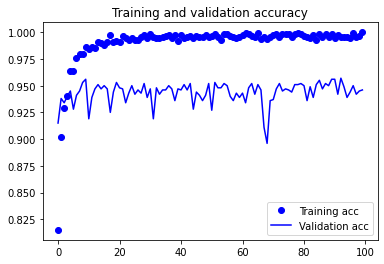

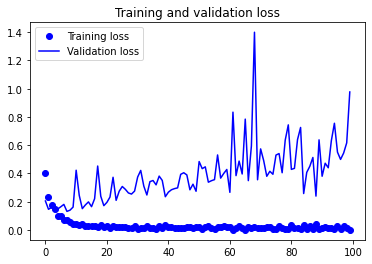

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

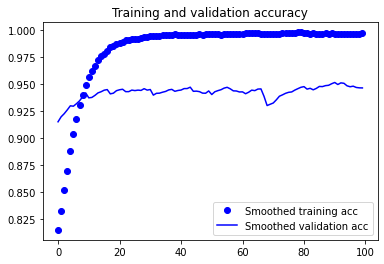

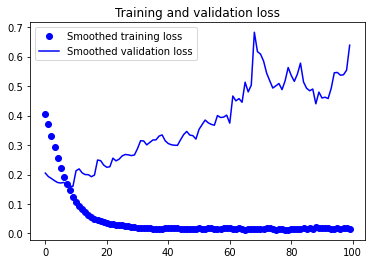

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()